<a href="https://colab.research.google.com/github/Bkevz/Data-Analytics/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENERGY METER USING ML

In [ ]:
!pip install scikit-learn

In [1]:
from pandas import read_csv

Loading Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Energy Meter.csv to Energy Meter.csv


Naming of the dataset

In [3]:
url = "Energy Meter.csv"
names = ['Voltage', 'Current', 'Power', 'class']
dataset = read_csv(url, names=names)
dataset

,Voltage,Current,Power,class
0,0.0000,0.000000,0.000000,NoLoad
1,0.0000,0.000000,0.000000,NoLoad
2,0.0000,0.000000,0.000000,NoLoad
3,0.0000,0.000000,0.000000,NoLoad
4,0.0000,0.000000,0.000000,NoLoad
...,...,...,...,...
395,214.2647,0.847530,181.595761,Risk
396,214.6480,0.850669,182.594400,Risk
397,215.0313,0.850669,182.920461,Risk
398,211.9649,0.850669,180.311970,Risk


Summary of the dataset

In [5]:
print(dataset.shape)
print(dataset.head(5))
print(dataset.describe())
print(dataset.groupby('class').size()) #count of data based on the classes.

(400, 4)
   Voltage  Current  Power   class
0      0.0      0.0    0.0  NoLoad
1      0.0      0.0    0.0  NoLoad
2      0.0      0.0    0.0  NoLoad
3      0.0      0.0    0.0  NoLoad
4      0.0      0.0    0.0  NoLoad
          Voltage     Current       Power
count  400.000000  400.000000  400.000000
mean   160.657320    0.317734   68.065053
std     93.125536    0.320430   68.941682
min      0.000000    0.000000    0.000000
25%     79.151450    0.076849    0.000000
50%    213.114800    0.176985   38.430426
75%    215.031300    0.398765  101.438042
max    304.340200    1.227349  264.859337
class
Medium    100
NoLoad    100
Normal    100
Risk      100
dtype: int64


Visualizing of data

In [6]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

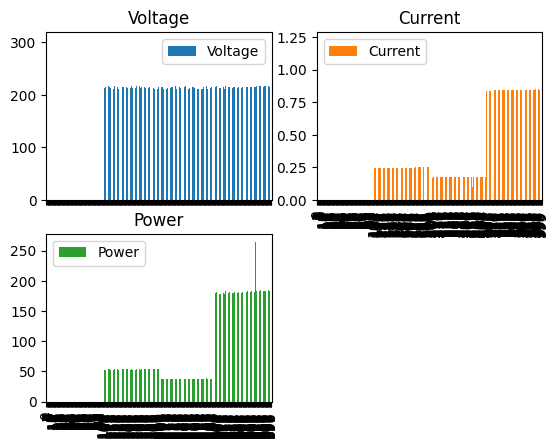

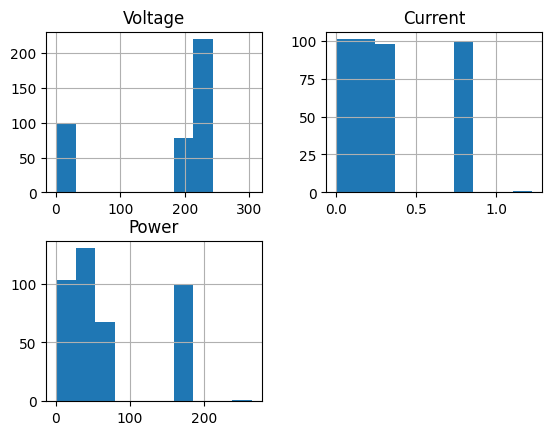

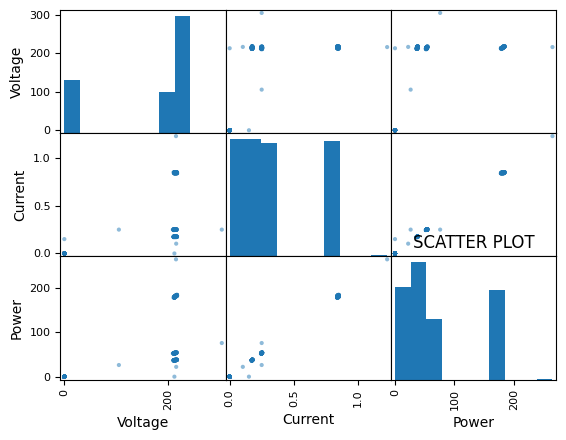

In [7]:
dataset.plot(kind='bar',subplots=True,layout=(2,2))
pyplot.title('BAR PLOT')
pyplot.show()

dataset.hist()
pyplot.title('HISTOGRAM PLOT')
pyplot.show()

scatter_matrix(dataset)
pyplot.title('SCATTER PLOT')
pyplot.show()

Evaluating MAchine Learning Algorithms

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split  #splitting data into train & test
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Splitting data for training and Testing.

In [9]:
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [10]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.996875 (0.009375)
LDA: 0.996875 (0.009375)
KNN: 0.993750 (0.018750)
CART: 0.996875 (0.009375)
NB: 0.990625 (0.020010)
SVM: 0.990625 (0.020010)


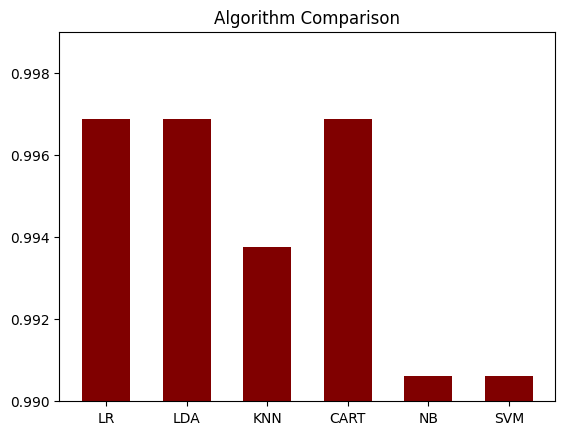

In [13]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.990, .999)
pyplot.bar(names, res, color ='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()